In [246]:
"""
Template for week 3 project in Data Visualization

Read, clean, and plot financial time series from stock indices using matplotlib
"""

import csv
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [247]:
# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"

# Financial data files
DJIA_34 = DATA_PATH + "DJIA_34.csv"
DJIA = DATA_PATH + "DJIA.csv"
NASDAQ_100 = DATA_PATH + "NASDAQ_100.csv"
NASDAQ = DATA_PATH + "NASDAQ.csv"
SP500 = DATA_PATH + "SP500.csv"


In [248]:
###################################################################
# Part 1 - Read, clean, and plot financial time series data 

def read_series(index_file):
    """
    Input: String index_file for CSV file containing stock index data
    
    Output: Time series as a list of tuples where each tuple is
    a pair of strings corresponding to a row in the CSV file
    """ 
    res = []
    with open(index_file, newline='') as f_read:
        reader = csv.reader(f_read)
        res = list(map(tuple, reader))
    return res

In [249]:
def clean_series(raw_series):
    """
    Input: List raw_series whose entries are tuples (date, price)
    where dates corresponding to holidays have price "."
    
    Output: A list whose entries are tuples consisting of
    a date (string) and a price (float). Entries corresponding
    to the header and holidays have been removed.
    """
    res = []
    for item in raw_series[1:]:
        date = item[0]
        price = item[1]
        if item[1] != ".":
            price = float(price)
            res.append((date, price)) 
    return res   

In [326]:
def plot_prices(index_file):
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consistin of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    d_f = read_series(index_file)
    arr = clean_series(d_f)
    x_list, y_list = [], []
    for x_i in range(len(arr)):
        x_list.append(arr[x_i][0])
        y_list.append(arr[x_i][1])
    x_list = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in x_list]
    fig, axs = plt.subplots()
    axs.plot(x_list, y_list)
    file_name = str(index_file)
    axs.set_xlabel("Date")
    axs.set_ylabel("Price($)")
    axs.set_title("Date vs Price(%s)"%(file_name))
    fig.autofmt_xdate()
    return fig

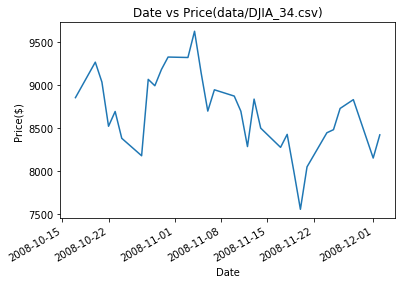

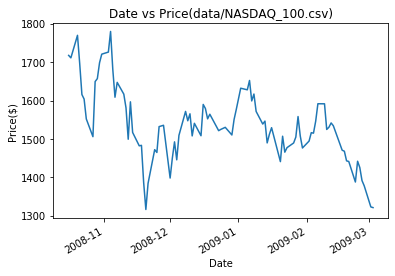

In [328]:
def test_plot_prices():
    """ Test plot_prices """
    
    plot_prices(DJIA_34)
    plot_prices(NASDAQ_100)

test_plot_prices()

In [325]:
###########################################################
# Part 2 - Convert ISO data format to days and make better plots

def isodate_to_day(isodate):
    """
    Input: A string date in ISO date format

    Output: Float corrspending to mumber of days used in
    matplotlib's plt.plot_date()
    """
    res = 0
    date_iso = datetime.date(*(int(s) for s in isodate.split('-')))
    year = date_iso.year
    month = date_iso.month
    day = date_iso.day
    if year < 1000:
        year = str(year).zfill(4)
    if month < 10:
        month = str(month).zfill(2)
    if day < 10:
        day = str(day).zfill(2)
    date_str = str(year)+'-'+str(month)+'-'+str(day)
    date_object = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
    res = mdates.date2num(date_object)
    return res

In [253]:
###########################################################
# Student code for more plots in matplotlib (peer-graded)

def plot_dates_prices(index_file):
    """
    Input: Strings index_file for CSV file with stock index data
    
    Output: matplotlib figure generated by reading the CSV file
    index_file and plotting the dates/prices using isodate_to_day()
    """
    d_f = read_series(index_file)
    arr = clean_series(d_f)
    x_list, y_list = [], []
    for x_i in range(len(arr)):
        x_list.append(arr[x_i][0])
        y_list.append(arr[x_i][1])
    x_list = [isodate_to_day(x) for x in x_list]  
    fig, axs = plt.subplots()
    axs.plot(x_list, y_list)
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axs.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
    axs.set_xlabel("Date")
    file_name = str(index_file)
    axs.set_ylabel("Price($)")
    axs.set_title("Date/Price(%s)"%(file_name))
    fig.autofmt_xdate()
    return fig

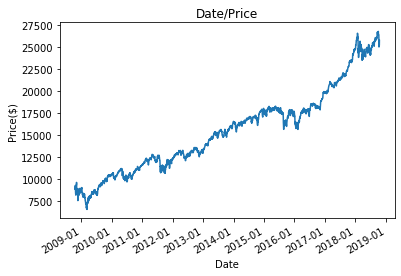

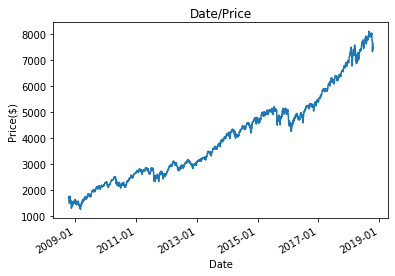

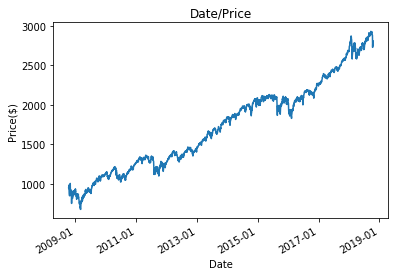

In [254]:
def test_plot_dates_prices():
    """ Test plot_dates_prices"""
    plot_dates_prices(DJIA)
    plot_dates_prices(NASDAQ)
    plot_dates_prices(SP500)   
test_plot_dates_prices()   

In [319]:
def plot_two_indices(index_file1, index_file2):
    """
    Input: Strings index_file1 and index_file2
    with CSV data for pair of stock indices
    
    Output: matplotlib figure generated by plotting a comparison
    of the price of two indices in the style of 
    https://matplotlib.org/gallery/api/two_scales.html
    """    
    arr_1 = clean_series(read_series(index_file1))
    x1_list, y1_list = [], []
    for x_i in range(len(arr_1)):
        x1_list.append(arr_1[x_i][0])
        y1_list.append(arr_1[x_i][1])
    x1_list = [isodate_to_day(x) for x in x1_list]  
    fig, ax1 = plt.subplots()
    file_1 = str(index_file1)
    ax1.plot(x1_list, y1_list, color='tab:red', label="%s"%(file_1))
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=False))
    ax1.set_xlabel("Date(ISO)")
    ax1.set_ylabel("Price($)", color='tab:red')
    ax1.set_title("Date/Price")
    ax1.legend()
    arr_2 = clean_series(read_series(index_file2))
    x2_list, y2_list = [], []
    for x_i in range(len(arr_2)):
        x2_list.append(arr_2[x_i][0])
        y2_list.append(arr_2[x_i][1])
    x2_list = [isodate_to_day(x) for x in x2_list]  
    
    ax2 = ax1.twinx()
    file_2 = str(index_file2)

    ax2.set_ylabel("Price($)", color='tab:blue')
    ax2.plot(x2_list, y2_list, color='tab:blue', label="%s"%(file_2))
    ax2.tick_params(axis='y', labelcolor='tab:blue') 
    ax2.legend(bbox_to_anchor=(0.02, 0.88), loc='upper left', borderaxespad=0)
    return fig

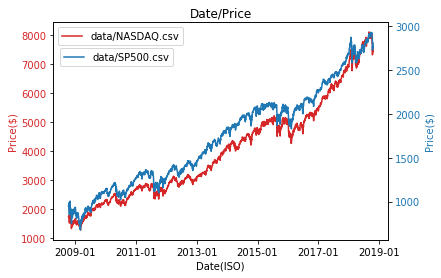

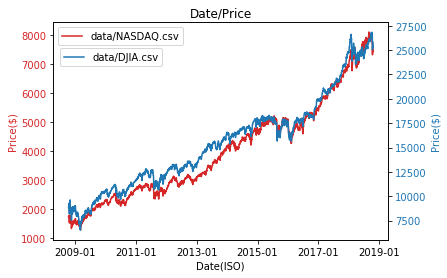

In [320]:
def test_plot_two_indices():
    """ Test plot_two_indices """
    
    plot_two_indices(NASDAQ, SP500)
    plot_two_indices(NASDAQ, DJIA)
    
test_plot_two_indices()